<a href="https://colab.research.google.com/github/NguyenVanLuu821/AI_Excerise_week12/blob/main/RECOGNIZE_ONE_FACE_USING_ANNi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY 

In [40]:
#import library 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


#2.GET DATA

In [41]:
with open('data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
# Reshape Data
x_pre = x_train[50] #using for recognize


In [42]:
# Reshape Data 
x_train = x_train.reshape(x_train.shape[0], -1)
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, 1)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

#3.CREATE MODEL

In [43]:
#create model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (67500,))) #67500 = 150*150*3, 67500 input and 16 noron for layer 1
model.add(Dense(10, activation='relu'))  #10 noron for layer 2
model.add(Dense(10, activation='relu'))  #10 noron for layer 3
model.add(Dense(10, activation='relu'))  #10 noron for layer 4
model.add(Dense(1,activation='sigmoid')) #1 noron for ouput

#4.TRAINING

In [44]:
model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

Epoch 1/50
3/3 [==============================] - 2s 230ms/step - loss: 0.2506 - accuracy: 1.0000 - val_loss: 8.9326e-06 - val_accuracy: 1.0000
Epoch 2/50
3/3 [==============================] - 0s 43ms/step - loss: 1.1895e-06 - accuracy: 1.0000 - val_loss: 3.7974e-08 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 91ms/step - loss: 2.6161e-09 - accuracy: 1.0000 - val_loss: 8.0955e-10 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 1.1645e-10 - accuracy: 1.0000 - val_loss: 4.6683e-11 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 63ms/step - loss: 2.6565e-12 - accuracy: 1.0000 - val_loss: 5.4091e-12 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 41ms/step - loss: 4.4069e-13 - accuracy: 1.0000 - val_loss: 1.0485e-12 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 47ms/step - loss: 1.4661e-13 - accuracy: 1.0000 - val_loss: 2.9965e-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


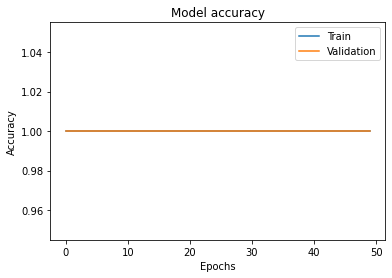

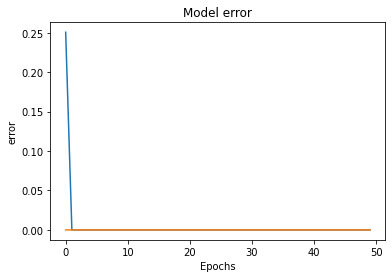

In [45]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

#plot error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

#5.PREDICT

(150, 150, 3)


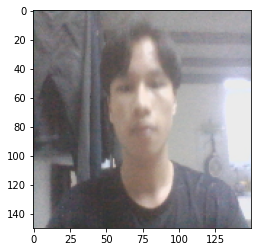

In [46]:
# Load Test Image
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB))
print(x_pre.shape)
img = x_pre.reshape(1,-1)
img = img.astype('float32')
img /= 255

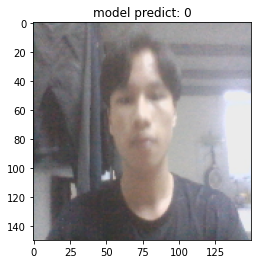

In [47]:
#recognize
plt.title("model predict: " + str(np.argmax(model.predict(img))))
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

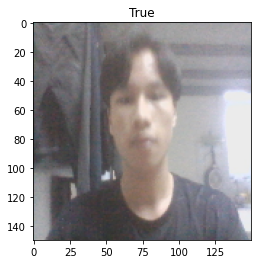

In [49]:
accuracy = model.predict(img)[0][0]
if accuracy > 0.8:
  plt.title("True")
else:
  plt.title("False")
plt.imshow(cv2.cvtColor(x_pre, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [50]:
#recognize
img = cv2.imread('1.png')
img = cv2.resize(img, (150,150))
img = img.reshape(1, 67500)
img = img.astype('float32')
img /= 255
accuracy = model.predict(img)[0][0]
print(accuracy)

1.0
